Research Questions

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)





Did the following:


Experimental Design
Did the project using the following procession:

Define the question

Expected flow for the assessment:

Perform your EDA

Perform feature engineering

Check of multicollinearity

Start building the model


Cross-validate the model


Compute RMSE


Perform regressions of model



Approach 1: Using Polynomial regression.


Create a model that predicts how many goals the home team scores

Approach 2: Using Logistic Regression.


Create a model that can predict whether the home team will win, draw or lose


Metrics of Success


Using Polynomial regression, the Root Mean Squared Error will be used to measure the performace of the model. 

The prediction of model using logistic regression model will be measured using the accuracy score


In [3]:
## Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
##
from scipy import stats
import warnings
warnings.simplefilter(action= 'ignore', category = FutureWarning)
##
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report

from sklearn.metrics import confusion_matrix

from sklearn import metrics
%matplotlib inline

Loading the dataset

In [4]:
## The fifa ranking dataset
fifa_rank = pd.read_csv("fifa_ranking.csv")
fifa_rank.head()
##
## Results dataset
fifa_result = pd.read_csv("results.csv")
fifa_result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Checking the Data

In [5]:
# Determining the no. of records in our dataset (fIfa_rank)
#
print('The fifa_rank dataset has ', fifa_rank.shape[1], ' columns and ', fifa_rank.shape[0], ' rows!')


The fifa_rank dataset has  16  columns and  57793  rows!


In [6]:
##
# Determining the no. of records in our dataset (results)
print('The fifa_result dataset has ', fifa_result.shape[1], ' columns and ', fifa_result.shape[0], ' rows!')

The fifa_result dataset has  9  columns and  40839  rows!


In [7]:
##
# Viewing the fifa_rank dataset (head)
fifa_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [8]:
##
## Viewing the fifa_result dataset  (head)
fifa_result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
##
## Viewing the fifa_rank dataset  (tail)
fifa_rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [10]:
##
## Viewing the fifa_result dataset (tail) 
fifa_result.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True



Exploratory Data Analysis


In [11]:
##
## Viewing the fifa_rank data types of the data set
fifa_rank.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [12]:
##
## Viewing the fifa_result data types of the data set
fifa_result.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [13]:
##
## Describing the fifa_rank dataset
fifa_rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [14]:
##
## Describing the fifa_result dataset
fifa_result.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [15]:
##
## Viewing the information for the fifa_rank dataset
fifa_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [16]:
##
## Viewing the information for the fifa_result dataset
fifa_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [17]:
## 
## Describing the fifa_rank datasetbusing the pandas profiling
# import pandas-profiling as pp
# pp.ProfileReport(fifa_rank)

In [18]:
##
## Desribing the fifa_result dataset using the pandas profilings
# import pandas_profiling
# pandas_profiling.ProfileReport(fifa_result)

Data Cleaning

In [19]:
##
## Checking for null values in the fifaRank dataset
fifa_rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [20]:
##
## Checking for null values in the fifaRank dataset
fifa_result.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [21]:
## Viewing columns of fifa_rank dataset
fifa_rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [22]:
## Viewing columns of fifa_result dataset
fifa_result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [23]:
## Dropping irrelevant columns in fifa_rank dataset
fifa_rank = fifa_rank.drop(['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation'], 1)

In [24]:
## Viewing columns after dropping irrelevant columns
fifa_rank.columns

Index(['rank', 'country_full', 'rank_date'], dtype='object')

In [25]:
##
## Dropping irrelevant columns in fifa_rank dataset
fifa_result = fifa_result.drop(['city'],1)

In [26]:
## Viewing columns after dropping columns
fifa_result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral'],
      dtype='object')

In [27]:
##
## Convert into date format the fifa_result dataset
fifa_rank['rank_date'] = pd.to_datetime(fifa_rank['rank_date'])
fifa_rank.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [28]:
##
## Convert into date format the fifa_result dataset
fifa_result['date'] = pd.to_datetime(fifa_result['date'])
fifa_result.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [29]:
## 
## Separate the date column into Year and Month of the fifa_rank dataset
fifa_rank['Year'] = fifa_rank.rank_date.dt.year
fifa_rank['month'] =fifa_rank.rank_date.dt.month
fifa_rank.head()

,rank,country_full,rank_date,Year,month
0,1,Germany,1993-08-08,1993,8
1,2,Italy,1993-08-08,1993,8
2,3,Switzerland,1993-08-08,1993,8
3,4,Sweden,1993-08-08,1993,8
4,5,Argentina,1993-08-08,1993,8


In [30]:
## 
## Separate the date column into Year and Month of the fifa_result dataset
fifa_result['Year'] = fifa_result.date.dt.year
fifa_result['month'] =fifa_result.date.dt.month
fifa_result.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,1876,3


In [31]:
## Making a copy of the original dataset of both fifa_rank and fifa_result
Rank_copy = fifa_rank.copy()
Result_copy = fifa_result.copy()
Rank_copy1 = fifa_rank.copy()

In [32]:
## Renaming country name in order to merge the two datasets :(Using the home_team column)
Rank_copy = Rank_copy.rename({'country_full': 'home_team'}, axis = 1)
Rank_copy.columns

Index(['rank', 'home_team', 'rank_date', 'Year', 'month'], dtype='object')

In [33]:
## Merging the two datasets using the similar columns : home_team, year and month
fifa1 = pd.merge(Result_copy, Rank_copy, how='left', on = ['home_team', 'Year', 'month'])
fifa1.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,rank,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,1872,11,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,1873,3,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,1874,3,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,1875,3,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,1876,3,NaN,NaT


In [34]:
fifa1.isnull().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
country           0
neutral           0
Year              0
month             0
rank          22299
rank_date     22299
dtype: int64

In [35]:
fifa1 = fifa1.dropna()

In [36]:
fifa1.tail()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,rank,rank_date
39976,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Russia,True,2018,6,27.0,2018-06-07
39977,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Russia,True,2018,6,55.0,2018-06-07
39978,2018-06-28,England,Belgium,0,1,FIFA World Cup,Russia,True,2018,6,12.0,2018-06-07
39979,2018-06-30,France,Argentina,4,3,FIFA World Cup,Russia,True,2018,6,7.0,2018-06-07
39980,2018-06-30,Uruguay,Portugal,2,1,FIFA World Cup,Russia,True,2018,6,14.0,2018-06-07


In [37]:
## Renaming country name in order to merge the two datasets i.e Using the away_team for merging
Rank_copy1 = Rank_copy1.rename({'country_full': 'away_team'}, axis = 1)
Rank_copy1.columns

Index(['rank', 'away_team', 'rank_date', 'Year', 'month'], dtype='object')

In [38]:
fifa1 = fifa1.rename({'rank': 'home_team_rank'}, axis = 1)
fifa1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral', 'Year', 'month', 'home_team_rank',
       'rank_date'],
      dtype='object')

In [39]:
##
## Merging the two datasets using the similar columns : away_team, year and month
fifa = pd.merge(fifa1, Rank_copy1, how='left', on = ['away_team', 'Year', 'month'])
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,home_team_rank,rank_date_x,rank,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,1993-08-08,67.0,1993-08-08
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,1993-08-08,5.0,1993-08-08
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,22.0,1993-08-08,35.0,1993-08-08
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False,1993,8,94.0,1993-08-08,8.0,1993-08-08
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,1993-08-08,25.0,1993-08-08


In [40]:
fifa = fifa.rename({'rank': 'away_team_rank'}, axis = 1)
fifa.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral', 'Year', 'month', 'home_team_rank',
       'rank_date_x', 'away_team_rank', 'rank_date_y'],
      dtype='object')

In [41]:
fifa.isnull().sum()

date                 0
home_team            0
away_team            0
home_score           0
away_score           0
tournament           0
country              0
neutral              0
Year                 0
month                0
home_team_rank       0
rank_date_x          0
away_team_rank    1773
rank_date_y       1773
dtype: int64

In [42]:
fifa = fifa.dropna()
# fifa.head()

In [43]:
## dropping null values 
fifa.isnull().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
country           0
neutral           0
Year              0
month             0
home_team_rank    0
rank_date_x       0
away_team_rank    0
rank_date_y       0
dtype: int64

In [44]:
## Viewing the dataset in favour of the away team
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,home_team_rank,rank_date_x,away_team_rank,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,1993-08-08,67.0,1993-08-08
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,1993-08-08,5.0,1993-08-08
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,22.0,1993-08-08,35.0,1993-08-08
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False,1993,8,94.0,1993-08-08,8.0,1993-08-08
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,1993-08-08,25.0,1993-08-08


In [45]:
## In favour of the home team
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,home_team_rank,rank_date_x,away_team_rank,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,1993-08-08,67.0,1993-08-08
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,1993-08-08,5.0,1993-08-08
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,22.0,1993-08-08,35.0,1993-08-08
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False,1993,8,94.0,1993-08-08,8.0,1993-08-08
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,1993-08-08,25.0,1993-08-08


In [46]:
# fifa1.to_csv('fifa1.csv')

fifa.to_csv('fifa.csv')

In [47]:
##
## (fifa1)- dataset 
fifa.tournament.unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',

In [48]:
## 
## Converting the tournament columns to: World cup, Friendly and others
def tournament(Games):
    if (Games == 'FIFA World Cup qualification') or (Games == 'FIFA World Cup'):
        return 'World_Cup'
    if Games == 'Friendly':
        return 'Friendly'
    else:
        return 'Other'
    

In [49]:
##
## Applying the function above
fifa['Games'] = fifa['tournament'].apply(lambda w: tournament(w))

In [50]:
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,home_team_rank,rank_date_x,away_team_rank,rank_date_y,Games
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,1993-08-08,67.0,1993-08-08,World_Cup
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,1993-08-08,5.0,1993-08-08,World_Cup
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,22.0,1993-08-08,35.0,1993-08-08,World_Cup
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False,1993,8,94.0,1993-08-08,8.0,1993-08-08,World_Cup
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,1993-08-08,25.0,1993-08-08,World_Cup


In [51]:
fifa.Games.unique()

array(['World_Cup', 'Friendly', 'Other'], dtype=object)

In [52]:
##
fifa.Games.unique()

array(['World_Cup', 'Friendly', 'Other'], dtype=object)

In [53]:
## Unique value of neutral dataset
fifa.neutral.unique()

array([False,  True])

In [54]:
##
## Converting the neutral categorical variable to numerical variable
## Using dummy indicators
fifa['neutral'] = pd.get_dummies(fifa['neutral'], drop_first=True)
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,home_team_rank,rank_date_x,away_team_rank,rank_date_y,Games
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,0,1993,8,19.0,1993-08-08,67.0,1993-08-08,World_Cup
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,0,1993,8,70.0,1993-08-08,5.0,1993-08-08,World_Cup
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,0,1993,8,22.0,1993-08-08,35.0,1993-08-08,World_Cup
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,0,1993,8,94.0,1993-08-08,8.0,1993-08-08,World_Cup
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,1,1993,8,58.0,1993-08-08,25.0,1993-08-08,World_Cup


In [55]:
## Unique value of neutral dataset after converting to numerical data 
fifa.neutral.value_counts()

0    12950
1     4007
Name: neutral, dtype: int64

In [56]:
fifa.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral', 'Year', 'month', 'home_team_rank',
       'rank_date_x', 'away_team_rank', 'rank_date_y', 'Games'],
      dtype='object')

In [57]:
## Dropping irrelevant columns on our final dataset
fifa = fifa.drop(['date', 'rank_date_x', 'rank_date_y', 'tournament'], 1)
fifa.head()                   

,home_team,away_team,home_score,away_score,country,neutral,Year,month,home_team_rank,away_team_rank,Games
0,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,67.0,World_Cup
1,Peru,Argentina,0,1,Peru,0,1993,8,70.0,5.0,World_Cup
2,Uruguay,Ecuador,0,0,Uruguay,0,1993,8,22.0,35.0,World_Cup
3,Venezuela,Brazil,1,5,Venezuela,0,1993,8,94.0,8.0,World_Cup
4,Senegal,Zambia,0,0,Ivory Coast,1,1993,8,58.0,25.0,World_Cup


In [58]:
## Converting the Games column: categorical variable to numerical variable
## Using dummy indicators
dummies = pd.get_dummies(fifa['Games'])
fifa = pd.concat([fifa, dummies], axis =1)

In [59]:
fifa.shape

(16957, 14)

In [60]:
##
## Dropping the games column after converting to numerical variable
fifa = fifa.drop(['Games'], 1)
fifa.head()

,home_team,away_team,home_score,away_score,country,neutral,Year,month,home_team_rank,away_team_rank,Friendly,Other,World_Cup
0,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,67.0,0,0,1
1,Peru,Argentina,0,1,Peru,0,1993,8,70.0,5.0,0,0,1
2,Uruguay,Ecuador,0,0,Uruguay,0,1993,8,22.0,35.0,0,0,1
3,Venezuela,Brazil,1,5,Venezuela,0,1993,8,94.0,8.0,0,0,1
4,Senegal,Zambia,0,0,Ivory Coast,1,1993,8,58.0,25.0,0,0,1


In [61]:
fifa.shape

(16957, 13)

In [62]:
## Creating a column that holds the value for a team winning, losing and drawing
fifa['performance'] = fifa['home_score'] - fifa['away_score']
fifa.head()

,home_team,away_team,home_score,away_score,country,neutral,Year,month,home_team_rank,away_team_rank,Friendly,Other,World_Cup,performance
0,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,67.0,0,0,1,0
1,Peru,Argentina,0,1,Peru,0,1993,8,70.0,5.0,0,0,1,-1
2,Uruguay,Ecuador,0,0,Uruguay,0,1993,8,22.0,35.0,0,0,1,0
3,Venezuela,Brazil,1,5,Venezuela,0,1993,8,94.0,8.0,0,0,1,-4
4,Senegal,Zambia,0,0,Ivory Coast,1,1993,8,58.0,25.0,0,0,1,0


In [63]:
## Creating new column that indicates win,lose or a draw to the home team
## Hint: Create function
def performance(Status):
    if Status > 0:
        return 'Win'
    if Status == 0:
        return 'Draw'
    elif Status < 0:
        return 'Lose'


In [64]:
##
## Applying the function above
fifa['Status'] = fifa['performance'].apply(lambda Status: performance(Status))

In [65]:
##
fifa.head()

,home_team,away_team,home_score,away_score,country,neutral,Year,month,home_team_rank,away_team_rank,Friendly,Other,World_Cup,performance,Status
0,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,67.0,0,0,1,0,Draw
1,Peru,Argentina,0,1,Peru,0,1993,8,70.0,5.0,0,0,1,-1,Lose
2,Uruguay,Ecuador,0,0,Uruguay,0,1993,8,22.0,35.0,0,0,1,0,Draw
3,Venezuela,Brazil,1,5,Venezuela,0,1993,8,94.0,8.0,0,0,1,-4,Lose
4,Senegal,Zambia,0,0,Ivory Coast,1,1993,8,58.0,25.0,0,0,1,0,Draw


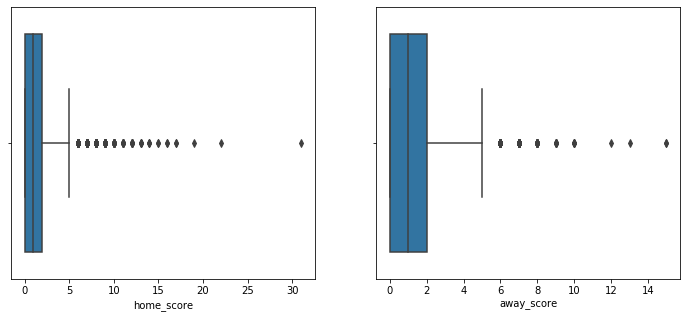

In [66]:
##
## Checking for outliers in home_csore and away_score column
fig,[ax1,ax2] = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(fifa.home_score, ax=ax1)
sns.boxplot(fifa.away_score, ax=ax2)
plt.show()



## From the boxplots, it can be seen that both the home score and away score columns have outliers.
## The outliers are important for modelling, so they will not be dropped

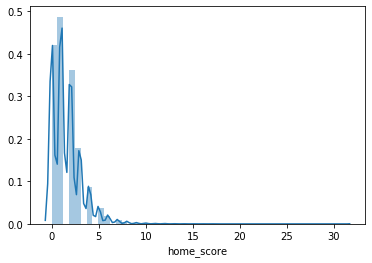

In [67]:
## Showing the Distribution of the home score 
sns.distplot(fifa["home_score"])
plt.show()

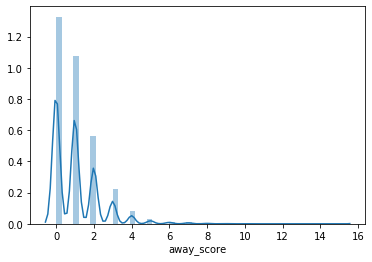

In [68]:
## Showing the Distribution of the away score 
sns.distplot(fifa["away_score"])
plt.show()

From the above histograms, it can be observed that the plots are skewed to the right, 
this means that the mean is less than both the median and mode of goals scored

In [69]:
## Checking for anomalies
fifa.skew()

home_score        2.323152
away_score        1.926660
neutral           1.241587
Year             -0.128466
month            -0.205057
home_team_rank    0.445365
away_team_rank    0.444181
Friendly          0.491572
Other             0.511478
World_Cup         1.197246
performance       0.619237
dtype: float64

In [70]:
# # Splitting the dataset into training and testing sets
# #
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

Modelling

Model 1


Multicollinearity

Refers to the situation in which two or more explanatory variables in a multiple regression model are highly linearly related. We have perfect multicollinearity, if the correlation between two independent variables is equal to 1 or −1

In [71]:
## Creating data set for dependent variables
multi = fifa[['home_score', 'away_score', 'home_team_rank', 'away_team_rank']].corr()
multi.head()

## The table below shows that the variable relate to one another.
## The coefficient of 1 across the diagonal looks good,the variable is perfectly correlated to itself.
## The correlations have been used to compute the VIF (Variance Inflation Factor) score for each variable.
## The VIF is created by finding the inverse matrix of the correations matrix.

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.000000,-0.163527,-0.135667,0.318611
away_score,-0.163527,1.000000,0.221319,-0.180431
home_team_rank,-0.135667,0.221319,1.000000,0.469478
away_team_rank,0.318611,-0.180431,0.469478,1.000000


In [72]:
## Creating the VIF dataframe from the above correlation
multi_vif = pd.DataFrame(np.linalg.inv(multi.values), index= multi.index, columns = multi.columns)
multi_vif

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.259328,-0.008819,0.464244,-0.620780
away_score,-0.008819,1.180261,-0.466537,0.434794
home_team_rank,0.464244,-0.466537,1.635728,-1.000030
away_team_rank,-0.620780,0.434794,-1.000030,1.745730


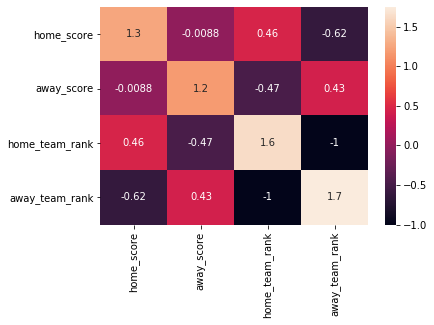

In [73]:
## Heatmap for the dependent variables
sns.heatmap(multi_vif, annot = True)
plt.show()


## There is no variable that is greater than 5 or close to 5
## Therefore there is no multicollinearity


Polynomial Regression



In [74]:
fifa.shape

(16957, 15)

In [90]:
## Chosing the independent and predictor variable
X = fifa['home_team_rank'].values.reshape(-1,1)
y = fifa['home_score'].values

In [103]:
## Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X)
## Training the model
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

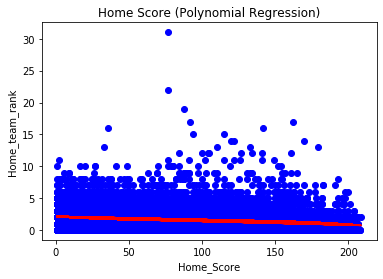

In [106]:
# # Visualize the polynomial results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(x_poly), color='red')
plt.title('Home Score (Polynomial Regression)')
plt.xlabel('Home_Score')
plt.ylabel('Home_team_rank')
plt.show()


Modelling

In [763]:
# Using linear regression to fit and predict the model
lr = LinearRegression()
lr.fit(X_train,y_train)

yh_pred = lr.predict(X_test)

#showing the predicted and the actual con currently
compare = pd.DataFrame({"Actual":y_test,"Predicted":yh_pred})

# Showing the RMSE of the linear model
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,yh_pred)))
print("r2_score is : ",r2_score(y_test,yh_pred))
print(compare.describe())

##
### The RMSE of 1.55489 which is higher than 10% of mean which is 0.16,
## thus it is not the perfect model as well but its not so far so it can still be used for modelling

RMSE is :  1.5548983821727371
r2_score is :  0.020781816570316525
            Actual    Predicted
count  3392.000000  3392.000000
mean      1.598762     1.600840
std       1.571543     0.218876
min       0.000000     1.043119
25%       0.000000     1.449633
50%       1.000000     1.625076
75%       2.000000     1.787682
max      19.000000     1.924613




Cross Validation




Computing RMSE


In [764]:
## Used KFold to train the model with the RMSE
from sklearn.model_selection import KFold
folds = KFold(n_splits=7)

# we can figure out how many folds we set up
# for it using get_n_splits

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')
# We now create and assess 5 models based on the folds we created.

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help

for train_index, test_index in folds.split(X):
 print('\nTraining model ' + str(count))
 # set up the train and test based on the split determined by KFold
 # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
 # fit a model accordingly
 regressor = LinearRegression()
 regressor.fit(X_train, y_train)
 # assess the accuraccy of the model
 pred = regressor.predict(X_test)
 rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, pred))
 RMSES.append(rmse_value)
 print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
 count = count + 1
    
    
## We will use Training Model 6 as the RMSE is the least as it is 1.423

we are using 7 folds

Training model 1
Model 1 Root Mean Squared Error: 1.6022261136570404

Training model 2
Model 2 Root Mean Squared Error: 1.9305087177252236

Training model 3
Model 3 Root Mean Squared Error: 1.603985705226351

Training model 4
Model 4 Root Mean Squared Error: 1.5375099711418156

Training model 5
Model 5 Root Mean Squared Error: 1.5165001621271106

Training model 6
Model 6 Root Mean Squared Error: 1.4231571653671806

Training model 7
Model 7 Root Mean Squared Error: 1.53911656908878


In [765]:
##
# Testing my model with several classiffiers to see the better classifier
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Several list of classifiers
classifier = []
classifier.append(('Logistic Regression ', LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(('Random Forest ', RandomForestClassifier()))
classifier.append(('GussianNB ', GaussianNB()))
classifier.append(('SVM ', SVC(gamma='auto')))

res = []
names = []

# Implementing cross valiadtaion
for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=0)
   cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   res.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
    
## We can see that logistic reggresion has the highest accuracy.
## thus we use it for classification modelling

Logistic Regression : 0.317922 (0.008280)
Random Forest : 0.291159 (0.002740)
GussianNB : 0.311455 (0.009648)
SVM : 0.296663 (0.007554)


Approach 2

Logistic Regression



In [766]:
classifier = []
classifier.append(('Logistic Regression ', LogisticRegression(solver='liblinear', multi_class='ovr')))

for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=0)
   cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   res.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

Logistic Regression : 0.317922 (0.008280)


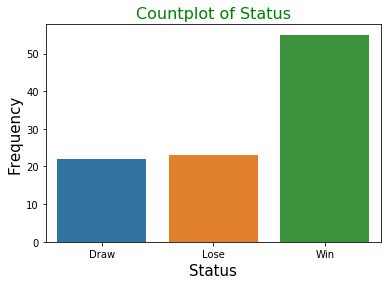

In [767]:
# visualizing the win draw and lose on a bar plot
sns.countplot('Status',data = fifa)
plt.xlabel("Status",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Countplot of Status",fontsize=16,color="green")
plt.show()

Heteroskedasticity

In [769]:
## Using critical value to find the heteroskedasticity
import scipy as sp
test_result, p_value = sp.stats.bartlett(pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

## comparing the critical value and the test result
if (test_result > critical_value):
 print('the variances are unequal, and the model should be reassessed')
else:
 print('the variances are homogeneous!')

inf
the variances are homogeneous!




The critical value is greater than the test result thus homogeneous 

This means that the variances are equal across the values of the independent variable

If test_result is greater than the critical value, reject our null hypothesis.

Therefore there are no patterns to the variance of the data




Challenging the Solution




Conclusion

From the above analysis, we can be observed that the LogisticRegression is the best for the different models for predicting whether the home team won, drew or lost a match, But yet so poor as the accuracy is very low
The accuracy was low for all models that I used.
This indicates that data is not enough for the question hence huge data is needed to improve different models and improve on the accuracy of the models too.

It should be noted that ranking data was not availble for the years below 1993.
Therefore more data is needed to make the model more reliable